## problem5
(a)reproduce equation(4.1)  

$rgdp_{t}=a_0-a_1t+a_2t^2+a_3t^3+e_t$


In [2]:
data<-read.csv("csvs/RGDP.csv",header=T)
#head(data)
#create dataset
N<-length(data$rgdp)
t1<-rep(0,N)
t2<-rep(0,N)
t3<-rep(0,N)

for (i in 1:length(data$rgdp)){
    t1[i]<-i
    t2[i]<-i**2
    t3[i]<-i**3
}
data1<-data.frame(rgdp=data$rgdp,t1=t1,t2=t2,t3=t3)
head(data1,n=2)
reg<-lm(rgdp~t1+t2+t3,data=data1)
#you can check data structure using str
#str(reg)

,rgdp,t1,t2,t3
,<dbl>,<dbl>,<dbl>,<dbl>
1,1770.7,1,1,1
2,1768.0,2,4,8


(b)estimate (4.29)

In [3]:
#library for unit-root-test
library(urca)
res<-ur.df(log(data$rgdp),"trend", lags=1, "Fixed")
summary(res)
#if you want to check object structure ,use str like below
#str(res)
#res@testreg$coefficients


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030533 -0.004380  0.000598  0.004866  0.034333 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.249e-01  7.919e-02   1.577    0.116    
z.lag.1     -1.563e-02  1.050e-02  -1.489    0.138    
tt           1.117e-04  8.506e-05   1.313    0.190    
z.diff.lag   3.663e-01  5.848e-02   6.263 1.57e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.009106 on 258 degrees of freedom
Multiple R-squared:  0.1569,	Adjusted R-squared:  0.1471 
F-statistic:    16 on 3 and 258 DF,  p-value: 1.43e-09


Value of test-statistic is: -1.4891 17.6119 2.9657 

Critical values for test statistics: 
      1pct  5pct 10pct
tau3 -

#problem10
(1)simulate DF distribution with intercept only

[1] -0.3772772

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-3.7747 -0.8613 -0.1921 -0.1820  0.5082  3.4153 

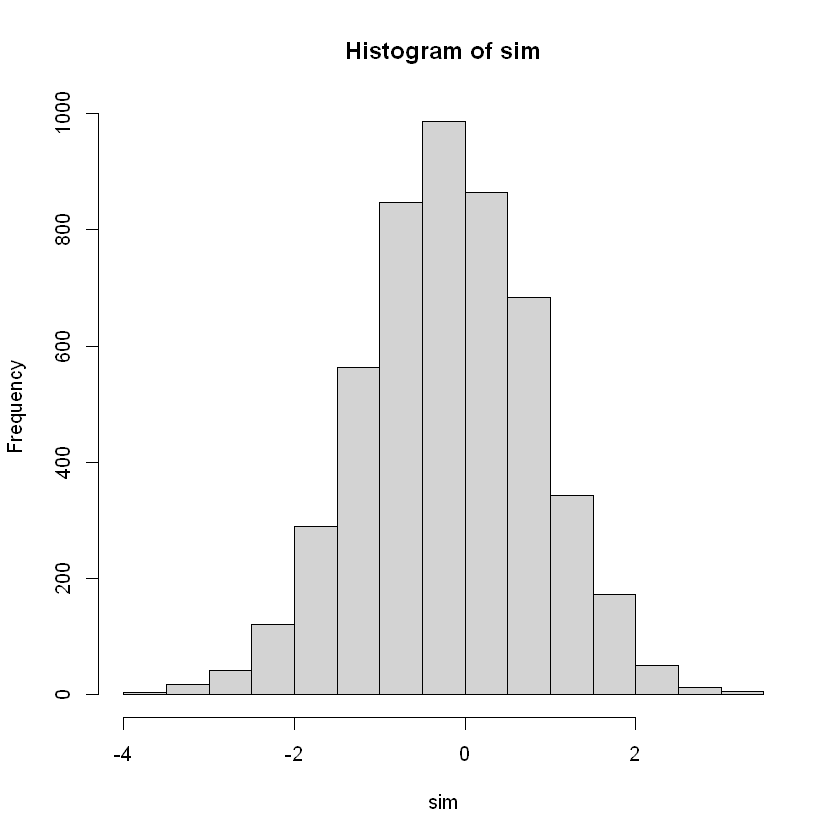

In [17]:
t_value<-function(a0=1){
    y<-rep(0,101)
    e<-rnorm(101,0,1)
    for (i in 1:100){
            y[i+1]<-a0+y[i]+e[i+1]
    
    }
    dy<-diff(y)
    y<-y[1:100]
    res<-lm(dy~y)
    #print(summary(res))
    #print("hogehoge")
    t_<-summary(res)$coefficients[2,3]
    return (t_)
}
t_value(3)
sim<-rep(5000)
for (i in 1:5000){
    sim[i]<-t_value(1)
}
summary(sim)
hist(sim)

